# CA2 Clustering resign
By : Joel Poah  
Class :  DAAA/FT/2A/02  
admin no : P2112729

## Goal is to cluster those employees that will resign 

In [20]:
import pandas as pd
import numpy as np
cluster = pd.read_csv('Company_Employee.csv')
cluster

,Age,Gender,BusinessTravel,Job Function,Distance Between Company and Home (KM),"Education (1 is lowest, 5 is highest)","Job Satisfaction (1 is lowest, 4 is highest)",MaritalStatus,Salary ($),"Performance Rating (1 is lowest, 4 is highest)","Work Life Balance (1 is worst, 4 is best)",Length of Service (Years),Resign Status
0,41,Female,Travel_Rarely,Sales,1,2,4,Single,5993,3,1,6,Yes
1,49,Male,Travel_Frequently,Research & Development,8,1,2,Married,5130,4,3,10,No
2,37,Male,Travel_Rarely,Research & Development,2,2,3,Single,2090,3,3,0,Yes
3,33,Female,Travel_Frequently,Research & Development,3,4,3,Married,2909,3,3,8,No
4,27,Male,Travel_Rarely,Research & Development,2,1,2,Married,3468,3,3,2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,Male,Travel_Frequently,Research & Development,23,2,4,Married,2571,3,3,5,No
1466,39,Male,Travel_Rarely,Research & Development,6,1,1,Married,9991,3,3,7,No
1467,27,Male,Travel_Rarely,Research & Development,4,3,2,Married,6142,4,3,6,No
1468,49,Male,Travel_Frequently,Sales,2,3,2,Married,5390,3,2,9,No


In [21]:
cluster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 13 columns):
 #   Column                                          Non-Null Count  Dtype 
---  ------                                          --------------  ----- 
 0   Age                                             1470 non-null   int64 
 1   Gender                                          1470 non-null   object
 2   BusinessTravel                                  1470 non-null   object
 3   Job Function                                    1470 non-null   object
 4   Distance Between Company and Home (KM)          1470 non-null   int64 
 5   Education (1 is lowest, 5 is highest)           1470 non-null   int64 
 6   Job Satisfaction (1 is lowest, 4 is highest)    1470 non-null   int64 
 7   MaritalStatus                                   1470 non-null   object
 8   Salary ($)                                      1470 non-null   int64 
 9   Performance Rating (1 is lowest, 4 is highest)  1470

# EDA process and finding out more of data
## Fortunately there is no null values

In [22]:
null = cluster.isnull().sum()
null

Age                                               0
Gender                                            0
BusinessTravel                                    0
Job Function                                      0
Distance Between Company and Home (KM)            0
Education (1 is lowest, 5 is highest)             0
Job Satisfaction (1 is lowest, 4 is highest)      0
MaritalStatus                                     0
Salary ($)                                        0
Performance Rating (1 is lowest, 4 is highest)    0
Work Life Balance (1 is worst, 4 is best)         0
Length of Service (Years)                         0
Resign Status                                     0
dtype: int64

## I will split the dataframe to numeric and categorical for now 

In [30]:
# get columns 0 ,4,5,6,8,9,10,11
num = cluster.iloc[:,4:7]
num2= cluster.iloc[:,8:11]
num =pd.concat([num,num2],axis=1)
num

,Distance Between Company and Home (KM),"Education (1 is lowest, 5 is highest)","Job Satisfaction (1 is lowest, 4 is highest)",Salary ($),"Performance Rating (1 is lowest, 4 is highest)","Work Life Balance (1 is worst, 4 is best)"
0,1,2,4,5993,3,1
1,8,1,2,5130,4,3
2,2,2,3,2090,3,3
3,3,4,3,2909,3,3
4,2,1,2,3468,3,3
...,...,...,...,...,...,...
1465,23,2,4,2571,3,3
1466,6,1,1,9991,3,3
1467,4,3,2,6142,4,3
1468,2,3,2,5390,3,2


In [29]:
cat = cluster.iloc [:,1:4]
cat1= cluster.iloc [:,7]
cat2= cluster.iloc[:,12]
cat=pd.concat([cat,cat1,cat2],axis=1)
cat


,Gender,BusinessTravel,Job Function,MaritalStatus,Resign Status
0,Female,Travel_Rarely,Sales,Single,Yes
1,Male,Travel_Frequently,Research & Development,Married,No
2,Male,Travel_Rarely,Research & Development,Single,Yes
3,Female,Travel_Frequently,Research & Development,Married,No
4,Male,Travel_Rarely,Research & Development,Married,No
...,...,...,...,...,...
1465,Male,Travel_Frequently,Research & Development,Married,No
1466,Male,Travel_Rarely,Research & Development,Married,No
1467,Male,Travel_Rarely,Research & Development,Married,No
1468,Male,Travel_Frequently,Sales,Married,No


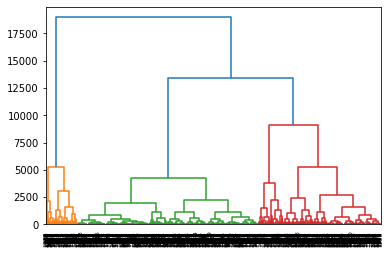

In [32]:
# Perform the necessary imports
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Calculate the linkage: mergings
mergings = linkage(num,method='complete')

# Plot the dendrogram
dendrogram(mergings,
           leaf_rotation=90,
           leaf_font_size=6,
)
plt.show()
